In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [68]:
df1=pd.read_csv('unsupervised_datasets/lexicon_step1.csv')
df2=pd.read_csv('unsupervised_datasets/lexicon_step2.csv')
df3=pd.read_csv('unsupervised_datasets/lexicon_step3.csv')
dfs=pd.read_csv('unsupervised_datasets/lexicon_all.csv')
print(len(dfs))
print(len(df1)+len(df2)+len(df3))

69346
69346


C:\Users\PC\AppData\Local\Temp\ipykernel_18972\3876974071.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs=pd.read_csv('unsupervised_datasets/lexicon_all.csv')


In [69]:
print(df1.columns)


Index(['created_at', 'user_id', 'username', 'tweet', 'place', 'near',
       'clean_tweet', 'tokens', 'lemma', 'lemma_sentence', 'pos_tag',
       'lemma_sentence(with POS)', 'sentiword_analysis', 'vader_score',
       'textblob_polarity'],
      dtype='object')


In [70]:
#sentiment for step1
#for textblob and sentiword
def senti_label(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [71]:
#for VADER
def senti_label_2(score):
    if score <= -0.05:
        return -1
    elif score >= 0.05:
        return 1
    else:
        return 0

In [72]:
#Step1
#using senti_label
df1['senti_textblob'] = df1['textblob_polarity'].apply(senti_label)
df1['senti_wordnet'] = df1['sentiword_analysis'].apply(senti_label)
df1.to_csv('supervised_sample_datasets/lexicon_step1.csv')
#counting
blob_1=df1.groupby('senti_textblob').count()
print("textblob_step1:",blob_1["textblob_polarity"])

wordnet_1=df1.groupby('senti_wordnet').count()
print("wordnet_step1:",wordnet_1["sentiword_analysis"])

#using senti_label_2
df1['senti_vader'] = df1['vader_score'].apply(senti_label_2)
df1
vader_1=df1.groupby('senti_vader').count()
print('vader_step1:',vader_1["vader_score"])
df1
df1.to_csv("supervised_sample_datasets/lexicon_step1.csv")

textblob_step1: senti_textblob
-1     7512
 0     6507
 1    15915
Name: textblob_polarity, dtype: int64
wordnet_step1: senti_wordnet
-1    10110
 0     3429
 1    16395
Name: sentiword_analysis, dtype: int64
vader_step1: senti_vader
-1    10638
 0     4489
 1    14807
Name: vader_score, dtype: int64


In [73]:
#Step2
#using senti_label
df2['senti_textblob'] = df2['textblob_polarity'].apply(senti_label)
df2['senti_wordnet'] = df2['sentiword_analysis'].apply(senti_label)
df2
#counting
blob_2=df2.groupby('senti_textblob').count()
print("textblob_step2:",blob_2["textblob_polarity"])

wordnet_2=df2.groupby('senti_wordnet').count()
print("wordnet_step2:",wordnet_2["sentiword_analysis"])

#using senti_label_2
df2['senti_vader'] = df2['vader_score'].apply(senti_label_2)
df2
vader_2=df2.groupby('senti_vader').count()
print('vader_step2:',vader_2["vader_score"])

textblob_step2: senti_textblob
-1     4943
 0     4577
 1    10966
Name: textblob_polarity, dtype: int64
wordnet_step2: senti_wordnet
-1     6742
 0     2483
 1    11261
Name: sentiword_analysis, dtype: int64
vader_step2: senti_vader
-1     7011
 0     3205
 1    10270
Name: vader_score, dtype: int64


In [74]:
#Step3
#using senti_label
df3['senti_textblob'] = df3['textblob_polarity'].apply(senti_label)
df3['senti_wordnet'] = df3['sentiword_analysis'].apply(senti_label)
df3
#counting
blob_3=df3.groupby('senti_textblob').count()
print("textblob_step3:",blob_3["textblob_polarity"])

wordnet_3=df3.groupby('senti_wordnet').count()
print("wordnet_step3:",wordnet_3["sentiword_analysis"])

#using senti_label_2
df3['senti_vader'] = df3['vader_score'].apply(senti_label_2)
vader_3=df3.groupby('senti_vader').count()
print('vader_step3:',vader_3["vader_score"])

textblob_step3: senti_textblob
-1    4973
 0    4154
 1    9799
Name: textblob_polarity, dtype: int64
wordnet_step3: senti_wordnet
-1     6403
 0     2244
 1    10279
Name: sentiword_analysis, dtype: int64
vader_step3: senti_vader
-1    6932
 0    3001
 1    8993
Name: vader_score, dtype: int64


In [75]:
#new dfs
new_dfs=[df1,df2,df3]
new_dfs=pd.concat(new_dfs)
new_dfs=new_dfs.reset_index(drop=True)
len(new_dfs)
# new_dfs.to_csv("unsupervised_datasets/lexicon_all.csv")

69346

In [76]:
dfs['senti_textblob'] = dfs['textblob_polarity'].apply(senti_label)
dfs['senti_wordnet'] = dfs['sentiword_analysis'].apply(senti_label)
dfs
#counting
blob_all=dfs.groupby('senti_textblob').count()
print("textblob_all:",blob_all["textblob_polarity"])

wordnet_all=dfs.groupby('senti_wordnet').count()
print("wordnet_all:",wordnet_all["sentiword_analysis"])

#using senti_label_2
dfs['senti_vader'] = dfs['vader_score'].apply(senti_label_2)
vader_all=dfs.groupby('senti_vader').count()
print('vader_all:',vader_all["vader_score"])

textblob_all: senti_textblob
-1    17428
 0    15238
 1    36680
Name: textblob_polarity, dtype: int64
wordnet_all: senti_wordnet
-1    23255
 0     8156
 1    37935
Name: sentiword_analysis, dtype: int64
vader_all: senti_vader
-1    24581
 0    10695
 1    34070
Name: vader_score, dtype: int64


In [77]:
vader_all=dfs.groupby('senti_vader').count()
print(vader_all["vader_score"])
wordnet_all=dfs.groupby('senti_wordnet').count()
print(wordnet_all["sentiword_analysis"])
blob_all=dfs.groupby('senti_textblob').count()
print(blob_all["textblob_polarity"])

senti_vader
-1    24581
 0    10695
 1    34070
Name: vader_score, dtype: int64
senti_wordnet
-1    23255
 0     8156
 1    37935
Name: sentiword_analysis, dtype: int64
senti_textblob
-1    17428
 0    15238
 1    36680
Name: textblob_polarity, dtype: int64


In [78]:
#extreme positive
slight_pos_wordnet = new_dfs[new_dfs['sentiword_analysis'].between(0.5,1)]
print("wordnet:",len(slight_pos_wordnet))
slight_pos_blob = new_dfs[new_dfs['textblob_polarity'].between(0.5,1)]
print("textbolb",len(slight_pos_blob))
slight_pos_vader = new_dfs[new_dfs['vader_score'].between(0.5,1)]
print("vader",len(slight_pos_vader))
#extreme negative 
slight_pos_wordnet = new_dfs[new_dfs['sentiword_analysis'].between(-1,-0.5)]
print("wordnet:",len(slight_pos_wordnet))
slight_pos_blob = new_dfs[new_dfs['textblob_polarity'].between(-1,-0.5)]
print("textblob",len(slight_pos_blob))
slight_pos_vader = new_dfs[new_dfs['vader_score'].between(-1,-0.5)]
print("vader",len(slight_pos_vader))

wordnet: 14109
textbolb 4791
vader 20444
wordnet: 8867
textblob 1599
vader 13245


In [81]:
#for each city: we use mean value to show their sentiment orientation of each city
#for england, each step with three methods,counting the number of negative, positive and neutral
#step1--Textblob
df1['near'] = df1['near'].astype(str)
#London
London_1 = df1[df1['near'].str.contains('London|london')]
London_1 = London_1.reset_index(drop=True)
#rows (include 1)/ all rows
london_pos_1=len(London_1[London_1['senti_textblob']==1])/len(London_1)
london_neg_1=len(London_1[London_1['senti_textblob']==-1])/len(London_1)
print("london_pos_1",round(london_pos_1,3))
print("london_neg_1",round(london_neg_1,3))

#Birmingham
Birmingham_1 = df1[df1['near'].str.contains('Birmingham|birmingham')]
Birmingham_1 = Birmingham_1.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_1=len(Birmingham_1[Birmingham_1['senti_textblob']==1])/len(Birmingham_1)
Birmingham_neg_1=len(Birmingham_1[Birmingham_1['senti_textblob']==-1])/len(Birmingham_1)
print("Birmingham_pos_1",round(Birmingham_pos_1,3))
print("Birmingham_neg_1",round(Birmingham_neg_1,3))

#Bristol
Bristol_1 = df1[df1['near'].str.contains('Bristol|bristol')]
Bristol_1 = Bristol_1.reset_index(drop=True)
Bristol_pos_1=len(Bristol_1[Bristol_1['senti_textblob']==1])/len(Bristol_1)
Bristol_neg_1=len(Bristol_1[Bristol_1['senti_textblob']==-1])/len(Bristol_1)
print("Bristol_pos_1",round(Bristol_pos_1,3))
print("Bristol_neg_1",round(Bristol_neg_1,3))

# #Leeds
Leeds_1 = df1[df1['near'].str.contains('Leeds|leeds')]
Leeds_1 = Leeds_1.reset_index(drop=True)
Leeds_pos_1=len(Leeds_1[Leeds_1['senti_textblob']==1])/len(Leeds_1)
Leeds_neg_1=len(Leeds_1[Leeds_1['senti_textblob']==-1])/len(Leeds_1)
print("Leeds_pos_1",round(Leeds_pos_1,3))
print("Leeds_neg_1",round(Leeds_neg_1,3))

# #Liverpool
Liverpool_1 = df1[df1['near'].str.contains('Liverpool|liverpool')]
Liverpool_1 = Liverpool_1.reset_index(drop=True)
Liverpool_pos_1=len(Liverpool_1[Liverpool_1['senti_textblob']==1])/len(Liverpool_1)
Liverpool_neg_1=len(Liverpool_1[Liverpool_1['senti_textblob']==-1])/len(Liverpool_1)
print("Liverpool_pos_1",round(Liverpool_pos_1,3))
print("Liverpool_neg_1",round(Liverpool_neg_1,3))

#Manchester
Manchester_1 = df1[df1['near'].str.contains('Manchester|manchester')]
Manchester_1 = Manchester_1.reset_index(drop=True)
Manchester_pos_1=len(Manchester_1[Manchester_1['senti_textblob']==1])/len(Manchester_1)
Manchester_neg_1=len(Manchester_1[Manchester_1['senti_textblob']==-1])/len(Manchester_1)
print("Manchester_pos_1",round(Manchester_pos_1,3))
print("Manchester_neg_1",round(Manchester_neg_1,3))

#Newcastle
Newcastle_1 = df1[df1['near'].str.contains('Newcastle|newcastle')]
Newcastle_1 = Newcastle_1.reset_index(drop=True)
Newcastle_pos_1=len(Newcastle_1[Newcastle_1['senti_textblob']==1])/len(Newcastle_1)
Newcastle_neg_1=len(Newcastle_1[Newcastle_1['senti_textblob']==-1])/len(Newcastle_1)
print("Newcastle_pos_1",round(Newcastle_pos_1,3))
print("Newcastle_neg_1",round(Newcastle_neg_1,3))

#Nottingham
Nottingham_1 = df1[df1['near'].str.contains('Nottingham|nottingham')]
Nottingham_1 = Nottingham_1.reset_index(drop=True)
Nottingham_pos_1=len(Nottingham_1[Nottingham_1['senti_textblob']==1])/len(Nottingham_1)
Nottingham_neg_1=len(Nottingham_1[Nottingham_1['senti_textblob']==-1])/len(Nottingham_1)
print("Nottingham_pos_1",round(Nottingham_pos_1,3))
print("Nottingham_neg_1",round(Nottingham_neg_1,3))

#Sheffield
Sheffield_1 = df1[df1['near'].str.contains('Sheffield|sheffield')]
Sheffield_1 = Sheffield_1.reset_index(drop=True)
Sheffield_pos_1=len(Sheffield_1[Sheffield_1['senti_textblob']==1])/len(Sheffield_1)
Sheffield_neg_1=len(Sheffield_1[Sheffield_1['senti_textblob']==-1])/len(Sheffield_1)
print("Sheffield_pos_1",round(Sheffield_pos_1,3))
print("Sheffield_neg_1",round(Sheffield_neg_1,3))

#Southampton
Southampton_1 = df1[df1['near'].str.contains('Southampton|southampton')]
Southampton_1 = Southampton_1.reset_index(drop=True)
Southampton_pos_1=len(Southampton_1[Southampton_1['senti_textblob']==1])/len(Southampton_1)
Southampton_neg_1=len(Southampton_1[Southampton_1['senti_textblob']==-1])/len(Southampton_1)
print("Southampton_pos_1",round(Southampton_pos_1,3))
print("Southampton_neg_1",round(Southampton_neg_1,3))

london_pos_1 0.525
london_neg_1 0.247
Birmingham_pos_1 0.544
Birmingham_neg_1 0.24
Bristol_pos_1 0.517
Bristol_neg_1 0.282
Leeds_pos_1 0.533
Leeds_neg_1 0.257
Liverpool_pos_1 0.529
Liverpool_neg_1 0.28
Manchester_pos_1 0.548
Manchester_neg_1 0.241
Newcastle_pos_1 0.533
Newcastle_neg_1 0.25
Nottingham_pos_1 0.552
Nottingham_neg_1 0.237
Sheffield_pos_1 0.514
Sheffield_neg_1 0.244
Southampton_pos_1 0.547
Southampton_neg_1 0.263


In [82]:
#step2--Textblob
#London
London_2 = df2[df2['near'].str.contains('London|london')]
London_2 = London_2.reset_index(drop=True)
#rows include 1/ all rows
london_pos_2=len(London_2[London_2['senti_textblob']==1])/len(London_2)
london_neg_2=len(London_2[London_2['senti_textblob']==-1])/len(London_2)
print("london_pos_2",round(london_pos_2,3))
print("london_neg_2",round(london_neg_2,3))

#Birmingham
Birmingham_2 = df2[df2['near'].str.contains('Birmingham|birmingham')]
Birmingham_2 = Birmingham_2.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_2=len(Birmingham_2[Birmingham_2['senti_textblob']==1])/len(Birmingham_2)
Birmingham_neg_2=len(Birmingham_2[Birmingham_2['senti_textblob']==-1])/len(Birmingham_2)
print("Birmingham_pos_2",round(Birmingham_pos_2,3))
print("Birmingham_neg_2",round(Birmingham_neg_2,3))

#Bristol
Bristol_2 = df2[df2['near'].str.contains('Bristol|bristol')]
Bristol_2 = Bristol_2.reset_index(drop=True)
Bristol_pos_2=len(Bristol_2[Bristol_2['senti_textblob']==1])/len(Bristol_2)
Bristol_neg_2=len(Bristol_2[Bristol_2['senti_textblob']==-1])/len(Bristol_2)
print("Bristol_pos_2",round(Bristol_pos_2,3))
print("Bristol_neg_2",round(Bristol_neg_2,3))

# #Leeds
Leeds_2 = df2[df2['near'].str.contains('Leeds|leeds')]
Leeds_2 = Leeds_2.reset_index(drop=True)
Leeds_pos_2=len(Leeds_2[Leeds_2['senti_textblob']==1])/len(Leeds_2)
Leeds_neg_2=len(Leeds_2[Leeds_2['senti_textblob']==-1])/len(Leeds_2)
print("Leeds_pos_2",round(Leeds_pos_2,3))
print("Leeds_neg_2",round(Leeds_neg_2,3))

# #Liverpool
Liverpool_2 = df2[df2['near'].str.contains('Liverpool|liverpool')]
Liverpool_2 = Liverpool_2.reset_index(drop=True)
Liverpool_pos_2=len(Liverpool_2[Liverpool_2['senti_textblob']==1])/len(Liverpool_2)
Liverpool_neg_2=len(Liverpool_2[Liverpool_2['senti_textblob']==-1])/len(Liverpool_2)
print("Liverpool_pos_2",round(Liverpool_pos_2,3))
print("Liverpool_neg_2",round(Liverpool_neg_2,3))

#Manchester
Manchester_2 = df2[df2['near'].str.contains('Manchester|manchester')]
Manchester_2 = Manchester_2.reset_index(drop=True)
Manchester_pos_2=len(Manchester_2[Manchester_2['senti_textblob']==1])/len(Manchester_2)
Manchester_neg_2=len(Manchester_2[Manchester_2['senti_textblob']==-1])/len(Manchester_2)
print("Manchester_pos_2",round(Manchester_pos_2,3))
print("Manchester_neg_2",round(Manchester_neg_2,3))

#Newcastle
Newcastle_2 = df2[df2['near'].str.contains('Newcastle|newcastle')]
Newcastle_2 = Newcastle_2.reset_index(drop=True)
Newcastle_pos_2=len(Newcastle_2[Newcastle_2['senti_textblob']==1])/len(Newcastle_2)
Newcastle_neg_2=len(Newcastle_2[Newcastle_2['senti_textblob']==-1])/len(Newcastle_2)
print("Newcastle_pos_2",round(Newcastle_pos_2,3))
print("Newcastle_neg_2",round(Newcastle_neg_2,3))

#Nottingham
Nottingham_2 = df2[df2['near'].str.contains('Nottingham|nottingham')]
Nottingham_2 = Nottingham_2.reset_index(drop=True)
Nottingham_pos_2=len(Nottingham_2[Nottingham_2['senti_textblob']==1])/len(Nottingham_2)
Nottingham_neg_2=len(Nottingham_2[Nottingham_2['senti_textblob']==-1])/len(Nottingham_2)
print("Nottingham_pos_2",round(Nottingham_pos_2,3))
print("Nottingham_neg_2",round(Nottingham_neg_2,3))

#Sheffield
Sheffield_2 = df2[df2['near'].str.contains('Sheffield|sheffield')]
Sheffield_2 = Sheffield_2.reset_index(drop=True)
Sheffield_pos_2=len(Sheffield_2[Sheffield_2['senti_textblob']==1])/len(Sheffield_2)
Sheffield_neg_2=len(Sheffield_2[Sheffield_2['senti_textblob']==-1])/len(Sheffield_2)
print("Sheffield_pos_2",round(Sheffield_pos_2,3))
print("Sheffield_neg_2",round(Sheffield_neg_2,3))

#Southampton
Southampton_2 = df2[df2['near'].str.contains('Southampton|southampton')]
Southampton_2 = Southampton_2.reset_index(drop=True)
Southampton_pos_2=len(Southampton_2[Southampton_2['senti_textblob']==1])/len(Southampton_2)
Southampton_neg_2=len(Southampton_2[Southampton_2['senti_textblob']==-1])/len(Southampton_2)
print("Southampton_pos_2",round(Southampton_pos_2,3))
print("Southampton_neg_2",round(Southampton_neg_2,3))

london_pos_2 0.528
london_neg_2 0.242
Birmingham_pos_2 0.528
Birmingham_neg_2 0.247
Bristol_pos_2 0.54
Bristol_neg_2 0.248
Leeds_pos_2 0.563
Leeds_neg_2 0.216
Liverpool_pos_2 0.527
Liverpool_neg_2 0.265
Manchester_pos_2 0.544
Manchester_neg_2 0.228
Newcastle_pos_2 0.586
Newcastle_neg_2 0.193
Nottingham_pos_2 0.581
Nottingham_neg_2 0.219
Sheffield_pos_2 0.499
Sheffield_neg_2 0.271
Southampton_pos_2 0.558
Southampton_neg_2 0.253


In [83]:
#step3--Textblob
#London
London_3 = df3[df3['near'].str.contains('London|london')]
London_3 = London_3.reset_index(drop=True)
#rows include 1/ all rows
london_pos_3=len(London_3[London_3['senti_textblob']==1])/len(London_3)
#len(London_1[London_1['senti_textblob']==0])/len(London_1)
london_neg_3=len(London_3[London_3['senti_textblob']==-1])/len(London_3)
print("london_pos_3",round(london_pos_3,3))
print("london_neg_3",round(london_neg_3,3))

#Birmingham
Birmingham_3 = df3[df3['near'].str.contains('Birmingham|birmingham')]
Birmingham_3 = Birmingham_3.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_3=len(Birmingham_3[Birmingham_3['senti_textblob']==1])/len(Birmingham_3)
Birmingham_neg_3=len(Birmingham_3[Birmingham_3['senti_textblob']==-1])/len(Birmingham_3)
print("Birmingham_pos_3",round(Birmingham_pos_3,3))
print("Birmingham_neg_3",round(Birmingham_neg_3,3))

#Bristol
Bristol_3 = df3[df3['near'].str.contains('Bristol|bristol')]
Bristol_3 = Bristol_3.reset_index(drop=True)
Bristol_pos_3=len(Bristol_3[Bristol_3['senti_textblob']==1])/len(Bristol_3)
Bristol_neg_3=len(Bristol_3[Bristol_3['senti_textblob']==-1])/len(Bristol_3)
print("Bristol_pos_3",round(Bristol_pos_3,3))
print("Bristol_neg_3",round(Bristol_neg_3,3))

# #Leeds
Leeds_3 = df3[df3['near'].str.contains('Leeds|leeds')]
Leeds_3 = Leeds_3.reset_index(drop=True)
Leeds_pos_3=len(Leeds_3[Leeds_3['senti_textblob']==1])/len(Leeds_3)
Leeds_neg_3=len(Leeds_3[Leeds_3['senti_textblob']==-1])/len(Leeds_3)
print("Leeds_pos_3",round(Leeds_pos_3,3))
print("Leeds_neg_3",round(Leeds_neg_3,3))

# #Liverpool
Liverpool_3 = df3[df3['near'].str.contains('Liverpool|liverpool')]
Liverpool_3 = Liverpool_3.reset_index(drop=True)
Liverpool_pos_3=len(Liverpool_3[Liverpool_3['senti_textblob']==1])/len(Liverpool_3)
Liverpool_neg_3=len(Liverpool_3[Liverpool_3['senti_textblob']==-1])/len(Liverpool_3)
print("Liverpool_pos_3",round(Liverpool_pos_3,3))
print("Liverpool_neg_3",round(Liverpool_neg_3,3))

#Manchester
Manchester_3 = df3[df3['near'].str.contains('Manchester|manchester')]
Manchester_3 = Manchester_3.reset_index(drop=True)
Manchester_pos_3=len(Manchester_3[Manchester_3['senti_textblob']==1])/len(Manchester_3)
Manchester_neg_3=len(Manchester_3[Manchester_3['senti_textblob']==-1])/len(Manchester_3)
print("Manchester_pos_3",round(Manchester_pos_3,2))
print("Manchester_neg_3",round(Manchester_neg_3,2))

#Newcastle
Newcastle_3 = df3[df3['near'].str.contains('Newcastle|newcastle')]
Newcastle_3 = Newcastle_3.reset_index(drop=True)
Newcastle_pos_3=len(Newcastle_3[Newcastle_3['senti_textblob']==1])/len(Newcastle_3)
Newcastle_neg_3=len(Newcastle_3[Newcastle_3['senti_textblob']==-1])/len(Newcastle_3)
print("Newcastle_pos_3",round(Newcastle_pos_3,3))
print("Newcastle_neg_3",round(Newcastle_neg_3,3))

#Nottingham
Nottingham_3 = df3[df3['near'].str.contains('Nottingham|nottingham')]
Nottingham_3 = Nottingham_3.reset_index(drop=True)
Nottingham_pos_3=len(Nottingham_3[Nottingham_3['senti_textblob']==1])/len(Nottingham_3)
Nottingham_neg_3=len(Nottingham_3[Nottingham_3['senti_textblob']==-1])/len(Nottingham_3)
print("Nottingham_pos_3",round(Nottingham_pos_3,3))
print("Nottingham_neg_3",round(Nottingham_neg_3,3))

#Sheffield
Sheffield_3 = df3[df3['near'].str.contains('Sheffield|sheffield')]
Sheffield_3 = Sheffield_3.reset_index(drop=True)
Sheffield_pos_3=len(Sheffield_3[Sheffield_3['senti_textblob']==1])/len(Sheffield_3)
Sheffield_neg_3=len(Sheffield_3[Sheffield_3['senti_textblob']==-1])/len(Sheffield_3)
print("Sheffield_pos_3",round(Sheffield_pos_3,3))
print("Sheffield_neg_3",round(Sheffield_neg_3,3))

#Southampton
Southampton_3 = df3[df3['near'].str.contains('Southampton|southampton')]
Southampton_3 = Southampton_3.reset_index(drop=True)
Southampton_pos_3=len(Southampton_3[Southampton_3['senti_textblob']==1])/len(Southampton_3)
Southampton_neg_3=len(Southampton_3[Southampton_3['senti_textblob']==-1])/len(Southampton_3)
print("Southampton_pos_3",round(Southampton_pos_3,3))
print("Southampton_neg_3",round(Southampton_neg_3,3))

london_pos_3 0.522
london_neg_3 0.256
Birmingham_pos_3 0.5
Birmingham_neg_3 0.292
Bristol_pos_3 0.508
Bristol_neg_3 0.277
Leeds_pos_3 0.52
Leeds_neg_3 0.251
Liverpool_pos_3 0.511
Liverpool_neg_3 0.272
Manchester_pos_3 0.53
Manchester_neg_3 0.26
Newcastle_pos_3 0.525
Newcastle_neg_3 0.245
Nottingham_pos_3 0.524
Nottingham_neg_3 0.261
Sheffield_pos_3 0.508
Sheffield_neg_3 0.252
Southampton_pos_3 0.502
Southampton_neg_3 0.284


In [84]:
#step1--VADER
#London
London_1 = df1[df1['near'].str.contains('London|london')]
London_1 = London_1.reset_index(drop=True)
#rows include 1/ all rows
london_pos_1=len(London_1[London_1['senti_vader']==1])/len(London_1)
#london_neu=len(London_1[London_1['senti_textblob']==0])/len(London_1)
london_neg_1=len(London_1[London_1['senti_vader']==-1])/len(London_1)
print("london_pos_1",round(london_pos_1,3))
print("london_neg_1",round(london_neg_1,3))
# print("london_neg_1",round(london_neu,3))
#Birmingham
Birmingham_1 = df1[df1['near'].str.contains('Birmingham|birmingham')]
Birmingham_1 = Birmingham_1.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_1=len(Birmingham_1[Birmingham_1['senti_vader']==1])/len(Birmingham_1)
Birmingham_neg_1=len(Birmingham_1[Birmingham_1['senti_vader']==-1])/len(Birmingham_1)
print("Birmingham_pos_1",round(Birmingham_pos_1,3))
print("Birmingham_neg_1",round(Birmingham_neg_1,3))

#Bristol
Bristol_1 = df1[df1['near'].str.contains('Bristol|bristol')]
Bristol_1 = Bristol_1.reset_index(drop=True)
Bristol_pos_1=len(Bristol_1[Bristol_1['senti_vader']==1])/len(Bristol_1)
Bristol_neg_1=len(Bristol_1[Bristol_1['senti_vader']==-1])/len(Bristol_1)
print("Bristol_pos_1",round(Bristol_pos_1,3))
print("Bristol_neg_1",round(Bristol_neg_1,3))

# #Leeds
Leeds_1 = df1[df1['near'].str.contains('Leeds|leeds')]
Leeds_1 = Leeds_1.reset_index(drop=True)
Leeds_pos_1=len(Leeds_1[Leeds_1['senti_vader']==1])/len(Leeds_1)
Leeds_neg_1=len(Leeds_1[Leeds_1['senti_vader']==-1])/len(Leeds_1)
print("Leeds_pos_1",round(Leeds_pos_1,3))
print("Leeds_neg_1",round(Leeds_neg_1,3))

#Liverpool
Liverpool_1 = df1[df1['near'].str.contains('Liverpool|liverpool')]
Liverpool_1 = Liverpool_1.reset_index(drop=True)
Liverpool_pos_1=len(Liverpool_1[Liverpool_1['senti_vader']==1])/len(Liverpool_1)
Liverpool_neg_1=len(Liverpool_1[Liverpool_1['senti_vader']==-1])/len(Liverpool_1)
print("Liverpool_pos_1",round(Liverpool_pos_1,3))
print("Liverpool_neg_1",round(Liverpool_neg_1,3))

#Manchester
Manchester_1 = df1[df1['near'].str.contains('Manchester|manchester')]
Manchester_1 = Manchester_1.reset_index(drop=True)
Manchester_pos_1=len(Manchester_1[Manchester_1['senti_vader']==1])/len(Manchester_1)
Manchester_neg_1=len(Manchester_1[Manchester_1['senti_vader']==-1])/len(Manchester_1)
print("Manchester_pos_1",round(Manchester_pos_1,3))
print("Manchester_neg_1",round(Manchester_neg_1,3))

#Newcastle
Newcastle_1 = df1[df1['near'].str.contains('Newcastle|newcastle')]
Newcastle_1 = Newcastle_1.reset_index(drop=True)
Newcastle_pos_1=len(Newcastle_1[Newcastle_1['senti_vader']==1])/len(Newcastle_1)
Newcastle_neg_1=len(Newcastle_1[Newcastle_1['senti_vader']==-1])/len(Newcastle_1)
print("Newcastle_pos_1",round(Newcastle_pos_1,3))
print("Newcastle_neg_1",round(Newcastle_neg_1,3))

#Nottingham
Nottingham_1 = df1[df1['near'].str.contains('Nottingham|nottingham')]
Nottingham_1 = Nottingham_1.reset_index(drop=True)
Nottingham_pos_1=len(Nottingham_1[Nottingham_1['senti_vader']==1])/len(Nottingham_1)
Nottingham_neg_1=len(Nottingham_1[Nottingham_1['senti_vader']==-1])/len(Nottingham_1)
print("Nottingham_pos_1",round(Nottingham_pos_1,3))
print("Nottingham_neg_1",round(Nottingham_neg_1,3))

#Sheffield
Sheffield_1 = df1[df1['near'].str.contains('Sheffield|sheffield')]
Sheffield_1 = Sheffield_1.reset_index(drop=True)
Sheffield_pos_1=len(Sheffield_1[Sheffield_1['senti_vader']==1])/len(Sheffield_1)
Sheffield_neg_1=len(Sheffield_1[Sheffield_1['senti_vader']==-1])/len(Sheffield_1)
print("Sheffield_pos_1",round(Sheffield_pos_1,3))
print("Sheffield_neg_1",round(Sheffield_neg_1,3))

#Southampton
Southampton_1 = df1[df1['near'].str.contains('Southampton|southampton')]
Southampton_1 = Southampton_1.reset_index(drop=True)
Southampton_pos_1=len(Southampton_1[Southampton_1['senti_vader']==1])/len(Southampton_1)
Southampton_neg_1=len(Southampton_1[Southampton_1['senti_vader']==-1])/len(Southampton_1)
print("Southampton_pos_1",round(Southampton_pos_1,3))
print("Southampton_neg_1",round(Southampton_neg_1,3))

london_pos_1 0.484
london_neg_1 0.358
Birmingham_pos_1 0.522
Birmingham_neg_1 0.347
Bristol_pos_1 0.49
Bristol_neg_1 0.366
Leeds_pos_1 0.529
Leeds_neg_1 0.331
Liverpool_pos_1 0.47
Liverpool_neg_1 0.39
Manchester_pos_1 0.505
Manchester_neg_1 0.34
Newcastle_pos_1 0.529
Newcastle_neg_1 0.279
Nottingham_pos_1 0.517
Nottingham_neg_1 0.339
Sheffield_pos_1 0.476
Sheffield_neg_1 0.372
Southampton_pos_1 0.5
Southampton_neg_1 0.363


In [85]:
#step2--VADER
#London
London_2 = df2[df2['near'].str.contains('London|london')]
London_2 = London_2.reset_index(drop=True)
#rows include 1/ all rows
london_pos_2=len(London_2[London_2['senti_vader']==1])/len(London_2)
#len(London_1[London_1['senti_textblob']==0])/len(London_1)
london_neg_2=len(London_2[London_2['senti_vader']==-1])/len(London_2)
print("london_pos_2",round(london_pos_2,3))
print("london_neg_2",round(london_neg_2,3))

#Birmingham
Birmingham_2 = df2[df2['near'].str.contains('Birmingham|birmingham')]
Birmingham_2 = Birmingham_2.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_2=len(Birmingham_2[Birmingham_2['senti_vader']==1])/len(Birmingham_2)
Birmingham_neg_2=len(Birmingham_2[Birmingham_2['senti_vader']==-1])/len(Birmingham_2)
print("Birmingham_pos_2",round(Birmingham_pos_2,3))
print("Birmingham_neg_2",round(Birmingham_neg_2,3))

#Bristol
Bristol_2 = df2[df2['near'].str.contains('Bristol|bristol')]
Bristol_2 = Bristol_2.reset_index(drop=True)
Bristol_pos_2=len(Bristol_2[Bristol_2['senti_vader']==1])/len(Bristol_2)
Bristol_neg_2=len(Bristol_2[Bristol_2['senti_vader']==-1])/len(Bristol_2)
print("Bristol_pos_2",round(Bristol_pos_2,3))
print("Bristol_neg_2",round(Bristol_neg_2,3))

# #Leeds
Leeds_2 = df2[df2['near'].str.contains('Leeds|leeds')]
Leeds_2 = Leeds_2.reset_index(drop=True)
Leeds_pos_2=len(Leeds_2[Leeds_2['senti_vader']==1])/len(Leeds_2)
Leeds_neg_2=len(Leeds_2[Leeds_2['senti_vader']==-1])/len(Leeds_2)
print("Leeds_pos_2",round(Leeds_pos_2,3))
print("Leeds_neg_2",round(Leeds_neg_2,3))

# #Liverpool
Liverpool_2 = df2[df2['near'].str.contains('Liverpool|liverpool')]
Liverpool_2 = Liverpool_2.reset_index(drop=True)
Liverpool_pos_2=len(Liverpool_2[Liverpool_2['senti_vader']==1])/len(Liverpool_2)
Liverpool_neg_2=len(Liverpool_2[Liverpool_2['senti_vader']==-1])/len(Liverpool_2)
print("Liverpool_pos_2",round(Liverpool_pos_2,3))
print("Liverpool_neg_2",round(Liverpool_neg_2,3))

#Manchester
Manchester_2 = df2[df2['near'].str.contains('Manchester|manchester')]
Manchester_2 = Manchester_2.reset_index(drop=True)
Manchester_pos_2=len(Manchester_2[Manchester_2['senti_vader']==1])/len(Manchester_2)
Manchester_neg_2=len(Manchester_2[Manchester_2['senti_vader']==-1])/len(Manchester_2)
print("Manchester_pos_2",round(Manchester_pos_2,3))
print("Manchester_neg_2",round(Manchester_neg_2,3))

#Newcastle
Newcastle_2 = df2[df2['near'].str.contains('Newcastle|newcastle')]
Newcastle_2 = Newcastle_2.reset_index(drop=True)
Newcastle_pos_2=len(Newcastle_2[Newcastle_2['senti_vader']==1])/len(Newcastle_2)
Newcastle_neg_2=len(Newcastle_2[Newcastle_2['senti_vader']==-1])/len(Newcastle_2)
print("Newcastle_pos_2",round(Newcastle_pos_2,3))
print("Newcastle_neg_2",round(Newcastle_neg_2,3))

#Nottingham
Nottingham_2 = df2[df2['near'].str.contains('Nottingham|nottingham')]
Nottingham_2 = Nottingham_2.reset_index(drop=True)
Nottingham_pos_2=len(Nottingham_2[Nottingham_2['senti_vader']==1])/len(Nottingham_2)
Nottingham_neg_2=len(Nottingham_2[Nottingham_2['senti_vader']==-1])/len(Nottingham_2)
print("Nottingham_pos_2",round(Nottingham_pos_2,3))
print("Nottingham_neg_2",round(Nottingham_neg_2,3))

#Sheffield
Sheffield_2 = df2[df2['near'].str.contains('Sheffield|sheffield')]
Sheffield_2 = Sheffield_2.reset_index(drop=True)
Sheffield_pos_2=len(Sheffield_2[Sheffield_2['senti_vader']==1])/len(Sheffield_2)
Sheffield_neg_2=len(Sheffield_2[Sheffield_2['senti_vader']==-1])/len(Sheffield_2)
print("Sheffield_pos_2",round(Sheffield_pos_2,3))
print("Sheffield_neg_2",round(Sheffield_neg_2,3))

#Southampton
Southampton_2 = df2[df2['near'].str.contains('Southampton|southampton')]
Southampton_2 = Southampton_2.reset_index(drop=True)
Southampton_pos_2=len(Southampton_2[Southampton_2['senti_vader']==1])/len(Southampton_2)
Southampton_neg_2=len(Southampton_2[Southampton_2['senti_vader']==-1])/len(Southampton_2)
print("Southampton_pos_2",round(Southampton_pos_2,3))
print("Southampton_neg_2",round(Southampton_neg_2,3))

london_pos_2 0.495
london_neg_2 0.341
Birmingham_pos_2 0.518
Birmingham_neg_2 0.347
Bristol_pos_2 0.475
Bristol_neg_2 0.378
Leeds_pos_2 0.523
Leeds_neg_2 0.301
Liverpool_pos_2 0.498
Liverpool_neg_2 0.354
Manchester_pos_2 0.503
Manchester_neg_2 0.338
Newcastle_pos_2 0.582
Newcastle_neg_2 0.253
Nottingham_pos_2 0.56
Nottingham_neg_2 0.314
Sheffield_pos_2 0.454
Sheffield_neg_2 0.381
Southampton_pos_2 0.509
Southampton_neg_2 0.351


In [86]:
#step3--VADER
#London
London_3 = df3[df3['near'].str.contains('London|london')]
London_3 = London_3.reset_index(drop=True)
#rows include 1/ all rows
london_pos_3=len(London_3[London_3['senti_vader']==1])/len(London_3)
#len(London_1[London_1['senti_textblob']==0])/len(London_1)
london_neg_3=len(London_3[London_3['senti_vader']==-1])/len(London_3)
print("london_pos_3",round(london_pos_3,3))
print("london_neg_3",round(london_neg_3,3))

#Birmingham
Birmingham_3 = df3[df3['near'].str.contains('Birmingham|birmingham')]
Birmingham_3 = Birmingham_3.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_3=len(Birmingham_3[Birmingham_3['senti_vader']==1])/len(Birmingham_3)
Birmingham_neg_3=len(Birmingham_3[Birmingham_3['senti_vader']==-1])/len(Birmingham_3)
print("Birmingham_pos_3",round(Birmingham_pos_3,3))
print("Birmingham_neg_3",round(Birmingham_neg_3,3))

#Bristol
Bristol_3 = df3[df3['near'].str.contains('Bristol|bristol')]
Bristol_3 = Bristol_3.reset_index(drop=True)
Bristol_pos_3=len(Bristol_3[Bristol_3['senti_vader']==1])/len(Bristol_3)
Bristol_neg_3=len(Bristol_3[Bristol_3['senti_vader']==-1])/len(Bristol_3)
print("Bristol_pos_3",round(Bristol_pos_3,3))
print("Bristol_neg_3",round(Bristol_neg_3,3))

# #Leeds
Leeds_3 = df3[df3['near'].str.contains('Leeds|leeds')]
Leeds_3 = Leeds_3.reset_index(drop=True)
Leeds_pos_3=len(Leeds_3[Leeds_3['senti_vader']==1])/len(Leeds_3)
Leeds_neg_3=len(Leeds_3[Leeds_3['senti_vader']==-1])/len(Leeds_3)
print("Leeds_pos_3",round(Leeds_pos_3,3))
print("Leeds_neg_3",round(Leeds_neg_3,3))

# #Liverpool
Liverpool_3 = df3[df3['near'].str.contains('Liverpool|liverpool')]
Liverpool_3 = Liverpool_3.reset_index(drop=True)
Liverpool_pos_3=len(Liverpool_3[Liverpool_3['senti_vader']==1])/len(Liverpool_3)
Liverpool_neg_3=len(Liverpool_3[Liverpool_3['senti_vader']==-1])/len(Liverpool_3)
print("Liverpool_pos_3",round(Liverpool_pos_3,3))
print("Liverpool_neg_3",round(Liverpool_neg_3,3))

#Manchester
Manchester_3 = df3[df3['near'].str.contains('Manchester|manchester')]
Manchester_3 = Manchester_3.reset_index(drop=True)
Manchester_pos_3=len(Manchester_3[Manchester_3['senti_vader']==1])/len(Manchester_3)
Manchester_neg_3=len(Manchester_3[Manchester_3['senti_vader']==-1])/len(Manchester_3)
print("Manchester_pos_3",round(Manchester_pos_3,2))
print("Manchester_neg_3",round(Manchester_neg_3,2))

#Newcastle
Newcastle_3 = df3[df3['near'].str.contains('Newcastle|newcastle')]
Newcastle_3 = Newcastle_3.reset_index(drop=True)
Newcastle_pos_3=len(Newcastle_3[Newcastle_3['senti_vader']==1])/len(Newcastle_3)
Newcastle_neg_3=len(Newcastle_3[Newcastle_3['senti_vader']==-1])/len(Newcastle_3)
print("Newcastle_pos_3",round(Newcastle_pos_3,3))
print("Newcastle_neg_3",round(Newcastle_neg_3,3))

#Nottingham
Nottingham_3 = df3[df3['near'].str.contains('Nottingham|nottingham')]
Nottingham_3 = Nottingham_3.reset_index(drop=True)
Nottingham_pos_3=len(Nottingham_3[Nottingham_3['senti_vader']==1])/len(Nottingham_3)
Nottingham_neg_3=len(Nottingham_3[Nottingham_3['senti_vader']==-1])/len(Nottingham_3)
print("Nottingham_pos_3",round(Nottingham_pos_3,3))
print("Nottingham_neg_3",round(Nottingham_neg_3,3))

#Sheffield
Sheffield_3 = df3[df3['near'].str.contains('Sheffield|sheffield')]
Sheffield_3 = Sheffield_3.reset_index(drop=True)
Sheffield_pos_3=len(Sheffield_3[Sheffield_3['senti_vader']==1])/len(Sheffield_3)
Sheffield_neg_3=len(Sheffield_3[Sheffield_3['senti_vader']==-1])/len(Sheffield_3)
print("Sheffield_pos_3",round(Sheffield_pos_3,3))
print("Sheffield_neg_3",round(Sheffield_neg_3,3))

#Southampton
Southampton_3 = df3[df3['near'].str.contains('Southampton|southampton')]
Southampton_3 = Southampton_3.reset_index(drop=True)
Southampton_pos_3=len(Southampton_3[Southampton_3['senti_vader']==1])/len(Southampton_3)
Southampton_neg_3=len(Southampton_3[Southampton_3['senti_vader']==-1])/len(Southampton_3)
print("Southampton_pos_3",round(Southampton_pos_3,3))
print("Southampton_neg_3",round(Southampton_neg_3,3))


london_pos_3 0.459
london_neg_3 0.379
Birmingham_pos_3 0.469
Birmingham_neg_3 0.363
Bristol_pos_3 0.467
Bristol_neg_3 0.383
Leeds_pos_3 0.511
Leeds_neg_3 0.329
Liverpool_pos_3 0.485
Liverpool_neg_3 0.378
Manchester_pos_3 0.51
Manchester_neg_3 0.34
Newcastle_pos_3 0.527
Newcastle_neg_3 0.299
Nottingham_pos_3 0.497
Nottingham_neg_3 0.367
Sheffield_pos_3 0.459
Sheffield_neg_3 0.36
Southampton_pos_3 0.451
Southampton_neg_3 0.374


In [87]:
#step1--WordNet
#London
# senti_wordnet
#London
London_1 = df1[df1['near'].str.contains('London|london')]
London_1 = London_1.reset_index(drop=True)
#rows include 1/ all rows
london_pos_1=len(London_1[London_1['senti_wordnet']==1])/len(London_1)
#london_neu=len(London_1[London_1['senti_textblob']==0])/len(London_1)
london_neg_1=len(London_1[London_1['senti_wordnet']==-1])/len(London_1)
print("london_pos_1",round(london_pos_1,3))
print("london_neg_1",round(london_neg_1,3))
# print("london_neg_1",round(london_neu,3))
#Birmingham
Birmingham_1 = df1[df1['near'].str.contains('Birmingham|birmingham')]
Birmingham_1 = Birmingham_1.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_1=len(Birmingham_1[Birmingham_1['senti_wordnet']==1])/len(Birmingham_1)
Birmingham_neg_1=len(Birmingham_1[Birmingham_1['senti_wordnet']==-1])/len(Birmingham_1)
print("Birmingham_pos_1",round(Birmingham_pos_1,3))
print("Birmingham_neg_1",round(Birmingham_neg_1,3))

#Bristol
Bristol_1 = df1[df1['near'].str.contains('Bristol|bristol')]
Bristol_1 = Bristol_1.reset_index(drop=True)
Bristol_pos_1=len(Bristol_1[Bristol_1['senti_wordnet']==1])/len(Bristol_1)
Bristol_neg_1=len(Bristol_1[Bristol_1['senti_wordnet']==-1])/len(Bristol_1)
print("Bristol_pos_1",round(Bristol_pos_1,3))
print("Bristol_neg_1",round(Bristol_neg_1,3))

# #Leeds
Leeds_1 = df1[df1['near'].str.contains('Leeds|leeds')]
Leeds_1 = Leeds_1.reset_index(drop=True)
Leeds_pos_1=len(Leeds_1[Leeds_1['senti_wordnet']==1])/len(Leeds_1)
Leeds_neg_1=len(Leeds_1[Leeds_1['senti_wordnet']==-1])/len(Leeds_1)
print("Leeds_pos_1",round(Leeds_pos_1,3))
print("Leeds_neg_1",round(Leeds_neg_1,3))

#Liverpool
Liverpool_1 = df1[df1['near'].str.contains('Liverpool|liverpool')]
Liverpool_1 = Liverpool_1.reset_index(drop=True)
Liverpool_pos_1=len(Liverpool_1[Liverpool_1['senti_wordnet']==1])/len(Liverpool_1)
Liverpool_neg_1=len(Liverpool_1[Liverpool_1['senti_wordnet']==-1])/len(Liverpool_1)
print("Liverpool_pos_1",round(Liverpool_pos_1,3))
print("Liverpool_neg_1",round(Liverpool_neg_1,3))

#Manchester
Manchester_1 = df1[df1['near'].str.contains('Manchester|manchester')]
Manchester_1 = Manchester_1.reset_index(drop=True)
Manchester_pos_1=len(Manchester_1[Manchester_1['senti_wordnet']==1])/len(Manchester_1)
Manchester_neg_1=len(Manchester_1[Manchester_1['senti_wordnet']==-1])/len(Manchester_1)
print("Manchester_pos_1",round(Manchester_pos_1,3))
print("Manchester_neg_1",round(Manchester_neg_1,3))

#Newcastle
Newcastle_1 = df1[df1['near'].str.contains('Newcastle|newcastle')]
Newcastle_1 = Newcastle_1.reset_index(drop=True)
Newcastle_pos_1=len(Newcastle_1[Newcastle_1['senti_wordnet']==1])/len(Newcastle_1)
Newcastle_neg_1=len(Newcastle_1[Newcastle_1['senti_wordnet']==-1])/len(Newcastle_1)
print("Newcastle_pos_1",round(Newcastle_pos_1,3))
print("Newcastle_neg_1",round(Newcastle_neg_1,3))

#Nottingham
Nottingham_1 = df1[df1['near'].str.contains('Nottingham|nottingham')]
Nottingham_1 = Nottingham_1.reset_index(drop=True)
Nottingham_pos_1=len(Nottingham_1[Nottingham_1['senti_wordnet']==1])/len(Nottingham_1)
Nottingham_neg_1=len(Nottingham_1[Nottingham_1['senti_wordnet']==-1])/len(Nottingham_1)
print("Nottingham_pos_1",round(Nottingham_pos_1,3))
print("Nottingham_neg_1",round(Nottingham_neg_1,3))

#Sheffield
Sheffield_1 = df1[df1['near'].str.contains('Sheffield|sheffield')]
Sheffield_1 = Sheffield_1.reset_index(drop=True)
Sheffield_pos_1=len(Sheffield_1[Sheffield_1['senti_wordnet']==1])/len(Sheffield_1)
Sheffield_neg_1=len(Sheffield_1[Sheffield_1['senti_wordnet']==-1])/len(Sheffield_1)
print("Sheffield_pos_1",round(Sheffield_pos_1,3))
print("Sheffield_neg_1",round(Sheffield_neg_1,3))

#Southampton
Southampton_1 = df1[df1['near'].str.contains('Southampton|southampton')]
Southampton_1 = Southampton_1.reset_index(drop=True)
Southampton_pos_1=len(Southampton_1[Southampton_1['senti_wordnet']==1])/len(Southampton_1)
Southampton_neg_1=len(Southampton_1[Southampton_1['senti_wordnet']==-1])/len(Southampton_1)
print("Southampton_pos_1",round(Southampton_pos_1,3))
print("Southampton_neg_1",round(Southampton_neg_1,3))

london_pos_1 0.54
london_neg_1 0.339
Birmingham_pos_1 0.539
Birmingham_neg_1 0.344
Bristol_pos_1 0.562
Bristol_neg_1 0.328
Leeds_pos_1 0.563
Leeds_neg_1 0.328
Liverpool_pos_1 0.535
Liverpool_neg_1 0.36
Manchester_pos_1 0.559
Manchester_neg_1 0.331
Newcastle_pos_1 0.529
Newcastle_neg_1 0.371
Nottingham_pos_1 0.578
Nottingham_neg_1 0.311
Sheffield_pos_1 0.544
Sheffield_neg_1 0.337
Southampton_pos_1 0.572
Southampton_neg_1 0.334


In [88]:
#step2--WordNet
#London
#step2--VADER
#London
London_2 = df2[df2['near'].str.contains('London|london')]
London_2 = London_2.reset_index(drop=True)
#rows include 1/ all rows
london_pos_2=len(London_2[London_2['senti_wordnet']==1])/len(London_2)
#len(London_1[London_1['senti_textblob']==0])/len(London_1)
london_neg_2=len(London_2[London_2['senti_wordnet']==-1])/len(London_2)
print("london_pos_2",round(london_pos_2,3))
print("london_neg_2",round(london_neg_2,3))

#Birmingham
Birmingham_2 = df2[df2['near'].str.contains('Birmingham|birmingham')]
Birmingham_2 = Birmingham_2.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_2=len(Birmingham_2[Birmingham_2['senti_wordnet']==1])/len(Birmingham_2)
Birmingham_neg_2=len(Birmingham_2[Birmingham_2['senti_wordnet']==-1])/len(Birmingham_2)
print("Birmingham_pos_2",round(Birmingham_pos_2,3))
print("Birmingham_neg_2",round(Birmingham_neg_2,3))

#Bristol
Bristol_2 = df2[df2['near'].str.contains('Bristol|bristol')]
Bristol_2 = Bristol_2.reset_index(drop=True)
Bristol_pos_2=len(Bristol_2[Bristol_2['senti_wordnet']==1])/len(Bristol_2)
Bristol_neg_2=len(Bristol_2[Bristol_2['senti_wordnet']==-1])/len(Bristol_2)
print("Bristol_pos_2",round(Bristol_pos_2,3))
print("Bristol_neg_2",round(Bristol_neg_2,3))

# #Leeds
Leeds_2 = df2[df2['near'].str.contains('Leeds|leeds')]
Leeds_2 = Leeds_2.reset_index(drop=True)
Leeds_pos_2=len(Leeds_2[Leeds_2['senti_wordnet']==1])/len(Leeds_2)
Leeds_neg_2=len(Leeds_2[Leeds_2['senti_wordnet']==-1])/len(Leeds_2)
print("Leeds_pos_2",round(Leeds_pos_2,3))
print("Leeds_neg_2",round(Leeds_neg_2,3))

# #Liverpool
Liverpool_2 = df2[df2['near'].str.contains('Liverpool|liverpool')]
Liverpool_2 = Liverpool_2.reset_index(drop=True)
Liverpool_pos_2=len(Liverpool_2[Liverpool_2['senti_wordnet']==1])/len(Liverpool_2)
Liverpool_neg_2=len(Liverpool_2[Liverpool_2['senti_wordnet']==-1])/len(Liverpool_2)
print("Liverpool_pos_2",round(Liverpool_pos_2,3))
print("Liverpool_neg_2",round(Liverpool_neg_2,3))

#Manchester
Manchester_2 = df2[df2['near'].str.contains('Manchester|manchester')]
Manchester_2 = Manchester_2.reset_index(drop=True)
Manchester_pos_2=len(Manchester_2[Manchester_2['senti_wordnet']==1])/len(Manchester_2)
Manchester_neg_2=len(Manchester_2[Manchester_2['senti_wordnet']==-1])/len(Manchester_2)
print("Manchester_pos_2",round(Manchester_pos_2,3))
print("Manchester_neg_2",round(Manchester_neg_2,3))

#Newcastle
Newcastle_2 = df2[df2['near'].str.contains('Newcastle|newcastle')]
Newcastle_2 = Newcastle_2.reset_index(drop=True)
Newcastle_pos_2=len(Newcastle_2[Newcastle_2['senti_wordnet']==1])/len(Newcastle_2)
Newcastle_neg_2=len(Newcastle_2[Newcastle_2['senti_wordnet']==-1])/len(Newcastle_2)
print("Newcastle_pos_2",round(Newcastle_pos_2,3))
print("Newcastle_neg_2",round(Newcastle_neg_2,3))

#Nottingham
Nottingham_2 = df2[df2['near'].str.contains('Nottingham|nottingham')]
Nottingham_2 = Nottingham_2.reset_index(drop=True)
Nottingham_pos_2=len(Nottingham_2[Nottingham_2['senti_wordnet']==1])/len(Nottingham_2)
Nottingham_neg_2=len(Nottingham_2[Nottingham_2['senti_wordnet']==-1])/len(Nottingham_2)
print("Nottingham_pos_2",round(Nottingham_pos_2,3))
print("Nottingham_neg_2",round(Nottingham_neg_2,3))

#Sheffield
Sheffield_2 = df2[df2['near'].str.contains('Sheffield|sheffield')]
Sheffield_2 = Sheffield_2.reset_index(drop=True)
Sheffield_pos_2=len(Sheffield_2[Sheffield_2['senti_wordnet']==1])/len(Sheffield_2)
Sheffield_neg_2=len(Sheffield_2[Sheffield_2['senti_wordnet']==-1])/len(Sheffield_2)
print("Sheffield_pos_2",round(Sheffield_pos_2,3))
print("Sheffield_neg_2",round(Sheffield_neg_2,3))

#Southampton
Southampton_2 = df2[df2['near'].str.contains('Southampton|southampton')]
Southampton_2 = Southampton_2.reset_index(drop=True)
Southampton_pos_2=len(Southampton_2[Southampton_2['senti_wordnet']==1])/len(Southampton_2)
Southampton_neg_2=len(Southampton_2[Southampton_2['senti_wordnet']==-1])/len(Southampton_2)
print("Southampton_pos_2",round(Southampton_pos_2,3))
print("Southampton_neg_2",round(Southampton_neg_2,3))

london_pos_2 0.542
london_neg_2 0.331
Birmingham_pos_2 0.55
Birmingham_neg_2 0.342
Bristol_pos_2 0.572
Bristol_neg_2 0.333
Leeds_pos_2 0.567
Leeds_neg_2 0.295
Liverpool_pos_2 0.522
Liverpool_neg_2 0.36
Manchester_pos_2 0.553
Manchester_neg_2 0.321
Newcastle_pos_2 0.618
Newcastle_neg_2 0.273
Nottingham_pos_2 0.568
Nottingham_neg_2 0.316
Sheffield_pos_2 0.556
Sheffield_neg_2 0.332
Southampton_pos_2 0.577
Southampton_neg_2 0.319


In [92]:
#step3--Wordnet
#London
#London
London_3 = df3[df3['near'].str.contains('London|london')]
London_3 = London_3.reset_index(drop=True)
#rows include 1/ all rows
london_pos_3=len(London_3[London_3['senti_wordnet']==1])/len(London_3)
#len(London_1[London_1['senti_textblob']==0])/len(London_1)
london_neg_3=len(London_3[London_3['senti_wordnet']==-1])/len(London_3)
print("london_pos_3",round(london_pos_3,3))
print("london_neg_3",round(london_neg_3,3))

#Birmingham
Birmingham_3 = df3[df3['near'].str.contains('Birmingham|birmingham')]
Birmingham_3 = Birmingham_3.reset_index(drop=True)
#rows include 1 or -1/ all rows
Birmingham_pos_3=len(Birmingham_3[Birmingham_3['senti_wordnet']==1])/len(Birmingham_3)
Birmingham_neg_3=len(Birmingham_3[Birmingham_3['senti_wordnet']==-1])/len(Birmingham_3)
print("Birmingham_pos_3",round(Birmingham_pos_3,3))
print("Birmingham_neg_3",round(Birmingham_neg_3,3))

#Bristol
Bristol_3 = df3[df3['near'].str.contains('Bristol|bristol')]
Bristol_3 = Bristol_3.reset_index(drop=True)
Bristol_pos_3=len(Bristol_3[Bristol_3['senti_wordnet']==1])/len(Bristol_3)
Bristol_neg_3=len(Bristol_3[Bristol_3['senti_wordnet']==-1])/len(Bristol_3)
print("Bristol_pos_3",round(Bristol_pos_3,3))
print("Bristol_neg_3",round(Bristol_neg_3,3))

# #Leeds
Leeds_3 = df3[df3['near'].str.contains('Leeds|leeds')]
Leeds_3 = Leeds_3.reset_index(drop=True)
Leeds_pos_3=len(Leeds_3[Leeds_3['senti_wordnet']==1])/len(Leeds_3)
Leeds_neg_3=len(Leeds_3[Leeds_3['senti_wordnet']==-1])/len(Leeds_3)
print("Leeds_pos_3",round(Leeds_pos_3,3))
print("Leeds_neg_3",round(Leeds_neg_3,3))

# #Liverpool
Liverpool_3 = df3[df3['near'].str.contains('Liverpool|liverpool')]
Liverpool_3 = Liverpool_3.reset_index(drop=True)
Liverpool_pos_3=len(Liverpool_3[Liverpool_3['senti_wordnet']==1])/len(Liverpool_3)
Liverpool_neg_3=len(Liverpool_3[Liverpool_3['senti_wordnet']==-1])/len(Liverpool_3)
print("Liverpool_pos_3",round(Liverpool_pos_3,3))
print("Liverpool_neg_3",round(Liverpool_neg_3,3))

#Manchester
Manchester_3 = df3[df3['near'].str.contains('Manchester|manchester')]
Manchester_3 = Manchester_3.reset_index(drop=True)
Manchester_pos_3=len(Manchester_3[Manchester_3['senti_wordnet']==1])/len(Manchester_3)
Manchester_neg_3=len(Manchester_3[Manchester_3['senti_wordnet']==-1])/len(Manchester_3)
print("Manchester_pos_3",round(Manchester_pos_3,2))
print("Manchester_neg_3",round(Manchester_neg_3,2))

#Newcastle
Newcastle_3 = df3[df3['near'].str.contains('Newcastle|newcastle')]
Newcastle_3 = Newcastle_3.reset_index(drop=True)
Newcastle_pos_3=len(Newcastle_3[Newcastle_3['senti_wordnet']==1])/len(Newcastle_3)
Newcastle_neg_3=len(Newcastle_3[Newcastle_3['senti_wordnet']==-1])/len(Newcastle_3)
print("Newcastle_pos_3",round(Newcastle_pos_3,3))
print("Newcastle_neg_3",round(Newcastle_neg_3,3))

#Nottingham
Nottingham_3 = df3[df3['near'].str.contains('Nottingham|nottingham')]
Nottingham_3 = Nottingham_3.reset_index(drop=True)
Nottingham_pos_3=len(Nottingham_3[Nottingham_3['senti_wordnet']==1])/len(Nottingham_3)
Nottingham_neg_3=len(Nottingham_3[Nottingham_3['senti_wordnet']==-1])/len(Nottingham_3)
print("Nottingham_pos_3",round(Nottingham_pos_3,3))
print("Nottingham_neg_3",round(Nottingham_neg_3,3))

#Sheffield
Sheffield_3 = df3[df3['near'].str.contains('Sheffield|sheffield')]
Sheffield_3 = Sheffield_3.reset_index(drop=True)
Sheffield_pos_3=len(Sheffield_3[Sheffield_3['senti_wordnet']==1])/len(Sheffield_3)
Sheffield_neg_3=len(Sheffield_3[Sheffield_3['senti_wordnet']==-1])/len(Sheffield_3)
print("Sheffield_pos_3",round(Sheffield_pos_3,3))
print("Sheffield_neg_3",round(Sheffield_neg_3,3))

#Southampton
Southampton_3 = df3[df3['near'].str.contains('Southampton|southampton')]
Southampton_3 = Southampton_3.reset_index(drop=True)
Southampton_pos_3=len(Southampton_3[Southampton_3['senti_wordnet']==1])/len(Southampton_3)
Southampton_neg_3=len(Southampton_3[Southampton_3['senti_wordnet']==-1])/len(Southampton_3)
print("Southampton_pos_3",round(Southampton_pos_3,3))
print("Southampton_neg_3",round(Southampton_neg_3,3))

london_pos_3 0.537
london_neg_3 0.342
Birmingham_pos_3 0.544
Birmingham_neg_3 0.346
Bristol_pos_3 0.533
Bristol_neg_3 0.342
Leeds_pos_3 0.549
Leeds_neg_3 0.337
Liverpool_pos_3 0.558
Liverpool_neg_3 0.325
Manchester_pos_3 0.56
Manchester_neg_3 0.32
Newcastle_pos_3 0.607
Newcastle_neg_3 0.297
Nottingham_pos_3 0.54
Nottingham_neg_3 0.352
Sheffield_pos_3 0.509
Sheffield_neg_3 0.372
Southampton_pos_3 0.552
Southampton_neg_3 0.338


In [91]:
#Comparison
#death number line chart
covid_df=pd.read_excel('comparison data/Comfirmed and Death data(covid).xlsx')
covid_df.info()
covid_df.drop('Unnamed: 3',axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'comparison data/Comfirmed and Death data(covid).xlsx'

In [222]:
vaccine_df=pd.read_excel('comparison data/vaccination_data.xlsx')
vaccine_df['Vaccination number'] = vaccine_df['Vaccination number'].values[::-1]
vaccine_df['Date'] = vaccine_df['Date'].values[::-1]
vaccine_df

,Date,Vaccination number
0,2021-01-11,165844
1,2021-01-12,223726
2,2021-01-13,288688
3,2021-01-14,321951
4,2021-01-15,345525
...,...,...
184,2021-07-14,246035
185,2021-07-15,263574
186,2021-07-16,271805
187,2021-07-17,292431


In [93]:
#line chart
#reference:
#https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
#https://stackoverflow.com/questions/45155510/plotting-mulitple-lines-on-two-y-axis-using-matplotlib

# import matplotlib.pyplot as plt

ax = covid_df.plot(x="Date", y="Deaths", legend=False, color="r")
ax2 = ax.twinx()
ax.grid(False)
ax2.grid(False)

covid_df.plot(x="Date", y="Cases", ax=ax2, legend=False, color="orange")
ax.figure.legend(loc='lower left')
plt.title("The Trend of Deaths and Comfirmed Cases")
plt.grid(b=None)
plt.savefig("visualizations/death and comfirm")
plt.show()

NameError: name 'covid_df' is not defined

In [94]:
#vaccination
plt.plot(vaccine_df['Date'], vaccine_df['Vaccination number'], color='b')
plt.title('New Vaccines Given by Date')
plt.xlabel('Date')
plt.ylabel('New Vaccine')
plt.grid(b=None)
plt.savefig("visualizations/vaccine")
plt.show()

NameError: name 'plt' is not defined

In [225]:
#the attitude for vaccine
#filter the data with vaccine related words
s = new_dfs['lemma_sentence(with POS)']
vaccine_df = new_dfs[s.str.contains('vaccine|vaccination|vaccinate|Oxford|Pfizer|Moderna|Janssen|dose', case=False)]
print(len(vaccine_df))
vaccine_df

13907


,created_at,user_id,username,tweet,place,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score,textblob_polarity,senti_textblob,senti_wordnet,senti_vader
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine days not weeks challe...,"['parliament', 'covid', 'vaccine', 'days', 'no...","['parliament', 'covid', 'vaccine', 'day', 'not...",parliament covid vaccine day not week challeng...,"[('parliament', 'n'), ('covid', 'n'), ('vaccin...",parliament covid vaccine day not week challe...,-0.625,-0.0572,0.000000,0,-1,-1
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,dose vaccination syringe combating covid,"['dose', 'vaccination', 'syringe', 'combating'...","['dose', 'vaccination', 'syringe', 'combating'...",dose vaccination syringe combating covid,"[('dose', 'a'), ('vaccination', 'n'), ('syring...",dose vaccination syringe combat covid,-0.125,-0.3400,0.000000,0,-1,-1
19,2021-01-06,2572796246,davidhuddo,@afneil There’s a huge difference between an a...,NaN,London,huge difference anti vaxer opposed vaccination...,"['huge', 'difference', 'anti', 'vaxer', 'oppos...","['huge', 'difference', 'anti', 'vaxer', 'oppos...",huge difference anti vaxer opposed vaccination...,"[('huge', 'a'), ('difference', 'n'), ('anti', ...",huge difference anti vaxer opposed vaccinati...,-2.500,-0.8658,-0.261111,-1,-1,-1
20,2021-01-06,19486557,nicolobattisti,Thankful to have received the first dose of th...,NaN,London,thankful received dose covid vaccine key step ...,"['thankful', 'received', 'dose', 'covid', 'vac...","['thankful', 'received', 'dose', 'covid', 'vac...",thankful received dose covid vaccine key step ...,"[('thankful', 'a'), ('received', 'v'), ('dose'...",thankful receive dose covid vaccine key step...,1.000,0.8625,-0.037500,-1,1,1
22,2021-01-06,271601849,senoralfie,Definitely an approach to #covid vaccination t...,NaN,London,approach covid vaccination considered,"['approach', 'covid', 'vaccination', 'consider...","['approach', 'covid', 'vaccination', 'consider...",approach covid vaccination considered,"[('approach', 'n'), ('covid', 'n'), ('vaccinat...",approach covid vaccination consider,0.250,0.0000,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77313,2021-05-28,1582595035,PPI_poppet,Single-dose Johnson &amp; Johnson Covid jab ap...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",single dose johnson johnson covid jab approved...,"['single', 'dose', 'johnson', 'johnson', 'covi...","['single', 'dose', 'johnson', 'johnson', 'covi...",single dose johnson johnson covid jab approved...,"[('single', 'a'), ('dose', 'n'), ('johnson', '...",single dose johnson johnson covid jab approv...,0.750,0.7717,-0.071429,-1,1,1
77317,2021-05-26,196165900,NotSoWittyUN,Obligatory COVID vaccine card post. I GOT A ST...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",obligatory covid vaccine card post sticker bab...,"['obligatory', 'covid', 'vaccine', 'card', 'po...","['obligatory', 'covid', 'vaccine', 'card', 'po...",obligatory covid vaccine card post sticker bab...,"[('obligatory', 'n'), ('covid', 'a'), ('vaccin...",obligatory covid vaccine card post sticker b...,0.125,0.4019,0.000000,0,1,1
77323,2021-05-22,159421884,LutherPeriLao,First dose COVID-19 vaccination done. 💉 😷 💪🏽 ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",dose covid vaccination syringe face medical ma...,"['dose', 'covid', 'vaccination', 'syringe', 'f...","['dose', 'covid', 'vaccination', 'syringe', 'f...",dose covid vaccination syringe face medical ma...,"[('dose', 'n'), ('covid', 'a'), ('vaccination'...",dose covid vaccination syringe face medical ...,0.000,0.0000,0.000000,0,0,0
77328,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463,

In [226]:
#The sentiment orientation for vaccine
#bar chart
#step one
import datetime
import warnings
warnings.filterwarnings("ignore")
vaccine_df['created_at'] = pd.to_datetime(vaccine_df['created_at'] , utc=True).dt.date
vaccine_step_one = vaccine_df[(vaccine_df['created_at']) < datetime.date(2021,3,8)].reset_index(drop=True)
print("step_one:",len(vaccine_step_one))

step_one: 5470


In [227]:
vaccine_step_two = vaccine_df[((vaccine_df['created_at']) >= datetime.date(2021,3,8)) & ((vaccine_df['created_at']) < datetime.date(2021,5,17))].reset_index(drop=True)
print("step_two:",len(vaccine_step_two))

step_two: 4521


In [228]:
vaccine_step_three= vaccine_df[((vaccine_df['created_at']) >= datetime.date(2021,5,17))].reset_index(drop=True)
print("step_three:",len(vaccine_step_three))
# vaccine_step_three

step_three: 3916


In [235]:
#count values:
vaccine_blob=vaccine_df.groupby('senti_textblob').count()
print("senti_textblob_step1:",vaccine_blob["textblob_polarity"])

vaccine_vader=vaccine_df.groupby('senti_vader').count()
print("senti_vader_step1:",vaccine_vader["vader_score"])

vaccine_wordnet=vaccine_df.groupby('senti_wordnet').count()
print("senti_wordnet_step1:",vaccine_wordnet["sentiword_analysis"])

senti_textblob_step1: senti_textblob
-1    2822
 0    5157
 1    5928
Name: textblob_polarity, dtype: int64
senti_vader_step1: senti_vader
-1    4256
 0    3083
 1    6568
Name: vader_score, dtype: int64
senti_wordnet_step1: senti_wordnet
-1    5830
 0    1926
 1    6151
Name: sentiword_analysis, dtype: int64


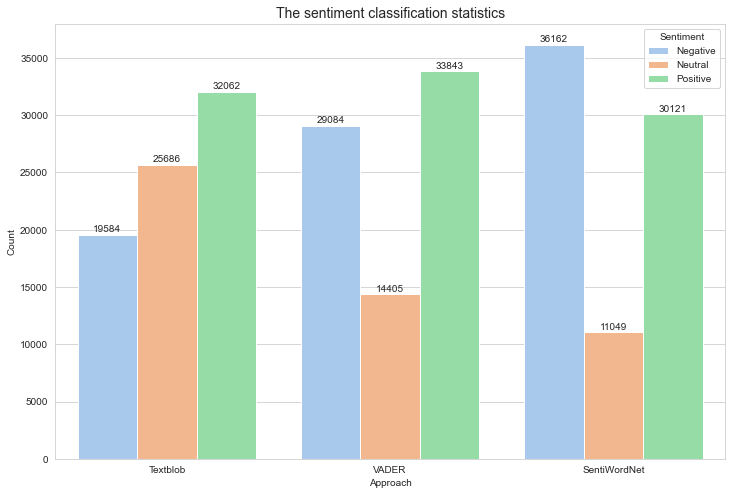

In [238]:
#reference: https://stackoverflow.com/questions/63220741/how-to-plot-and-annotate-grouped-bars-in-seaborn
import seaborn as sns
covid_plot=pd.read_excel('result/total_results(covid)/plot_covid.xlsx')
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")
s = sns.barplot(x="Approach", y="Count", data=covid_plot, hue="Sentiment",saturation=.8,palette=sns.color_palette('pastel'))
ax.set_title('The sentiment classification statistics',fontsize=14)

for patch in ax.patches:
    ax.annotate(f"{patch.get_height():.0f}", (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext =(0, 5), textcoords='offset points')
plt.savefig("visualizations/all sentiments.png")

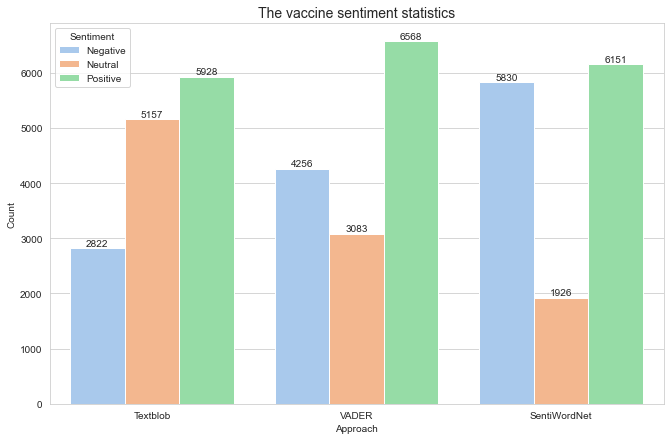

In [237]:
import seaborn as sns
vaccine_plot=pd.read_excel('result/total_results(vaccine)/plot_vaccine.xlsx')
fig, ax = plt.subplots(figsize=(11, 7))
# ax2 = ax.twinx()
sns.set_style("whitegrid")
s = sns.barplot(x="Approach", y="Count", data=vaccine_plot, hue="Sentiment", saturation=.8, palette=sns.color_palette('pastel'))
ax.set_title('The vaccine sentiment statistics',fontsize=14)

for patch in ax.patches:
    ax.annotate(f"{patch.get_height():.0f}", (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext =(0, 5), textcoords='offset points')
plt.savefig("visualizations/vaccine sentiments.png")

In [49]:
#double lines
#https://stackoverflow.com/questions/38810009/matplotlib-plot-bar-and-line-charts-together
total_ave = [['Step1', 0.147], ['Step2', 0.159], ['Step3', 0.118]]
total_ave_df = pd.DataFrame(total_ave, columns = ['Step', 'Ave_score'])
total_ave_df

,Step,Ave_score
0,Step1,0.147
1,Step2,0.159
2,Step3,0.118


In [50]:
vaccine_ave = [['Step1', 0.279], ['Step2', 0.196], ['Step3', 0.172]]
vaccine_ave_df = pd.DataFrame(total_ave, columns = ['Step', 'Ave_score'])
vaccine_ave_df

,Step,Ave_score
0,Step1,0.147
1,Step2,0.159
2,Step3,0.118


In [ ]:
#two-line chart